## **TASK** **- 2**

#🛳️ Titanic Dataset Analysis With Python

##📦 Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##📂 Loading Dataset

In [6]:
# Load the dataset
df = pd.read_csv('train.csv')

In [7]:
# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Display Last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 🔍 Viewing Dataset Information

In [9]:
# View Dataset Info
print("🔎 Dataset Information:\n")
df.info()

🔎 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Summary Statistics
print("\n📊 Dataset Description:\n")
print(df.describe())


📊 Dataset Description:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
# Shape of the dataset
print("\nDataset Shape:", df.shape)


Dataset Shape: (891, 12)


## 🧹 Data Cleaning

In [12]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Check for missing values
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 🔄 Encode Categorical Features 🧠

In [13]:
#  Encode categorical columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

## 🔍 Exploratory Data Analysis (EDA)

🎯 Survival Count

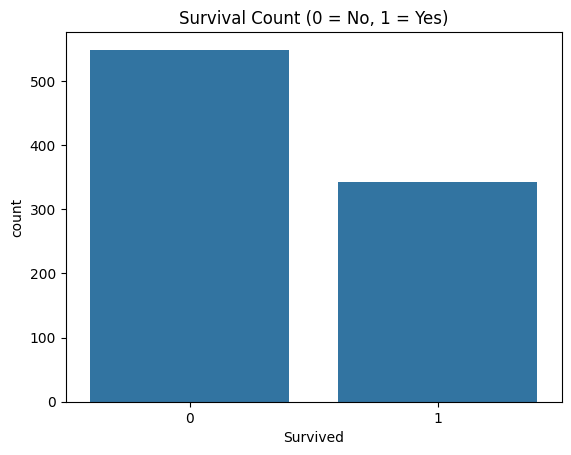

In [14]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

🧑‍🤝‍🧑 Survival by Gender

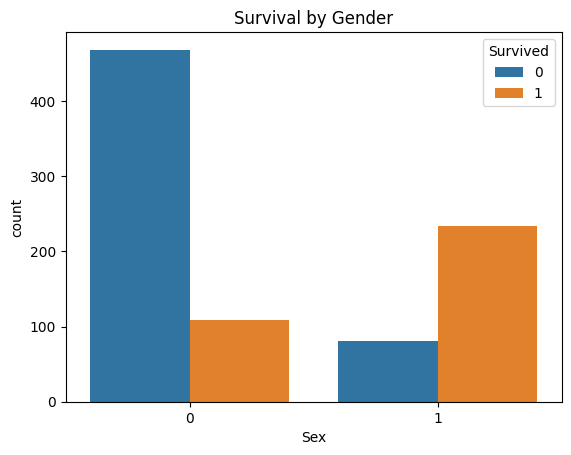

In [15]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

🛏️ Survival by Passenger Class

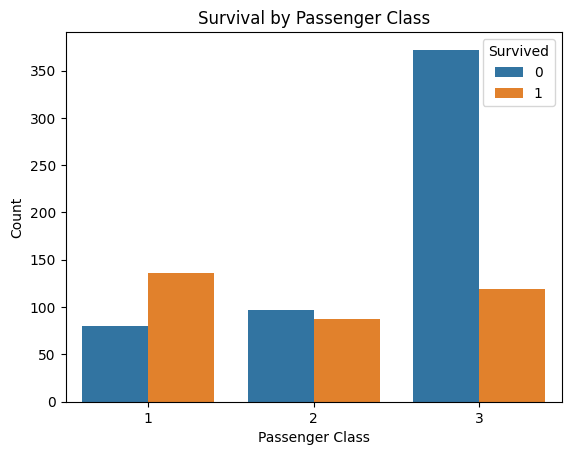

In [16]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


🧒 Age Distribution

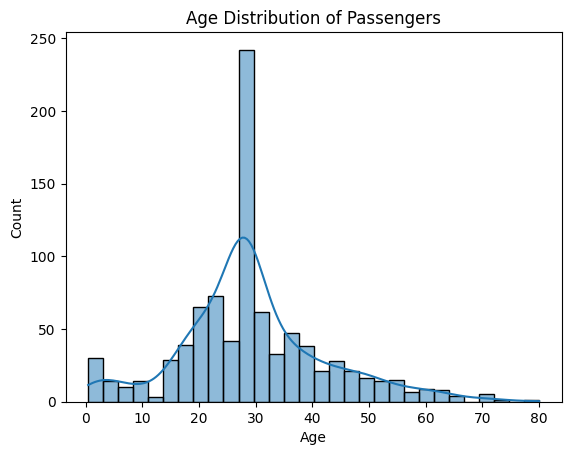

In [17]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

💰 Fare Distribution

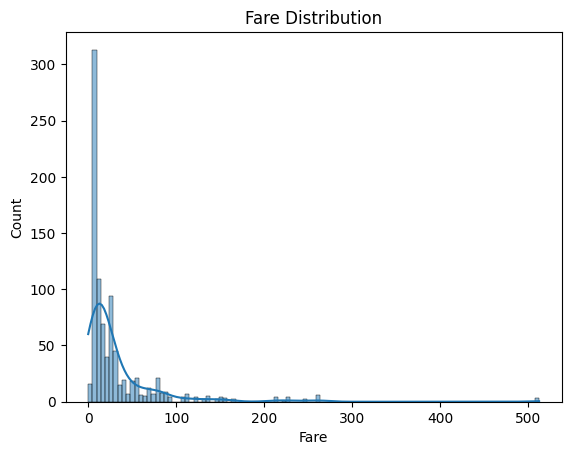

In [18]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

🔗 Correlation Heatmap

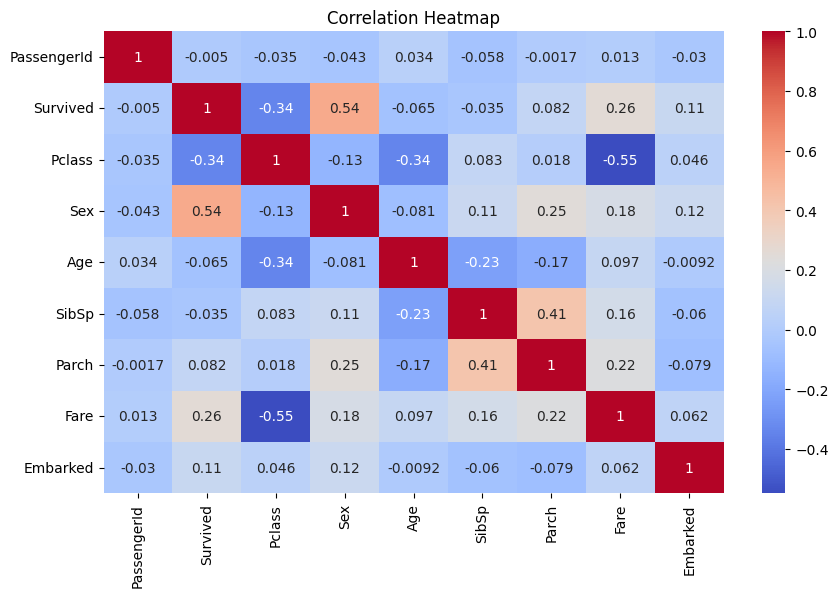

In [19]:
# Correlation heatmap for numeric features only
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🎯 Select Features and Target Variable 🎯


In [20]:
# Feature selection and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

##🧪 Split the Data into Training and Testing Sets 🔍

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🛠️ Train Logistic Regression Model 🤖

In [22]:
# Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## 📈  Make Predictions and Evaluate Accuracy ✅

In [23]:
#  Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Logistic Regression Model Accuracy: {accuracy*100:.2f}%")


✅ Logistic Regression Model Accuracy: 79.89%


## 📝 Final Conclusion and Observations 💡

In [24]:
#  Conclusion
print("\n🎯 Conclusion:")
print("• Female passengers had significantly higher survival rates than males.")
print("• 1st class passengers had better chances of survival.")
print("• Fare and age were moderately correlated with survival.")
print("• Logistic Regression achieved", round(accuracy*100, 2), "% accuracy on test data.")


🎯 Conclusion:
• Female passengers had significantly higher survival rates than males.
• 1st class passengers had better chances of survival.
• Fare and age were moderately correlated with survival.
• Logistic Regression achieved 79.89 % accuracy on test data.
